In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.filterwarnings('ignore')

# Exploratary Data Analysis
In this part, our purpose is to understand the dataset's general structure and behaviour, before applying preprocessing.

In [2]:
df = pd.read_csv("bank-additional.csv", sep=';')
print(df.shape)
print(df.head())

(4119, 21)
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euri

In [3]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [4]:
# Number of unique values in each column in the dataframe
df.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

In [5]:
# we can see that no value is null but some of them are typed as unknown. We should consider that.
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


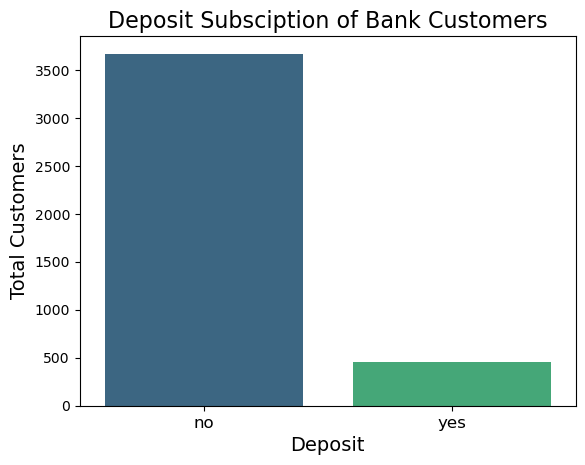

In [6]:
# We can see that the number of people who said no comprises the dataset compared to people who said yes.
fig, ax = plt.subplots()
sns.countplot(x ='y', hue='y', data = df, palette = 'viridis')

plt.title('Deposit Subsciption of Bank Customers', fontsize = 16)
plt.xlabel('Deposit', fontsize = 14)
plt.ylabel('Total Customers', fontsize = 14)
plt.xticks(fontsize = 12)

# Show the plot
plt.show()

In [7]:
# Percentage of who accepted term deposit and who is not
perc = df['y'].value_counts(normalize=True)*100
print(perc)

y
no     89.05074
yes    10.94926
Name: proportion, dtype: float64


In [8]:
for job in df.job.unique():
    total = len(df[(df['job'] == job)])
    subscribed = len(df[(df['job'] == job) & (df['y'] == 'yes')])
    percentage_subscribed = (subscribed/total) * 100
    print('Among {} customers who are in {} category, percentage of customers subscribed deposit is {} .'.format(total, job, percentage_subscribed))


     

Among 884 customers who are in blue-collar category, percentage of customers subscribed deposit is 6.900452488687783 .
Among 393 customers who are in services category, percentage of customers subscribed deposit is 8.9058524173028 .
Among 1012 customers who are in admin. category, percentage of customers subscribed deposit is 13.142292490118576 .
Among 148 customers who are in entrepreneur category, percentage of customers subscribed deposit is 5.405405405405405 .
Among 159 customers who are in self-employed category, percentage of customers subscribed deposit is 8.176100628930817 .
Among 691 customers who are in technician category, percentage of customers subscribed deposit is 11.577424023154848 .
Among 324 customers who are in management category, percentage of customers subscribed deposit is 9.25925925925926 .
Among 82 customers who are in student category, percentage of customers subscribed deposit is 23.170731707317074 .
Among 166 customers who are in retired category, percentage

In [9]:
for marital in df.marital.unique():
    total = len(df[(df['marital'] == marital)])
    subscribed = len(df[(df['marital'] == marital) & (df['y'] == 'yes')])
    percentage_subscribed = (subscribed/total) * 100
    print('Among {} {} customers, percentage of customers subscribed deposit is {} .'.format(total, marital, percentage_subscribed))

Among 2509 married customers, percentage of customers subscribed deposit is 10.0438421681945 .
Among 1153 single customers, percentage of customers subscribed deposit is 13.443191673894189 .
Among 446 divorced customers, percentage of customers subscribed deposit is 9.641255605381167 .
Among 11 unknown customers, percentage of customers subscribed deposit is 9.090909090909092 .


In [10]:
for education in df.education.unique():
    total = len(df[(df['education'] == education)])
    subscribed = len(df[(df['education'] == education) & (df['y'] == 'yes')])
    percentage_subscribed = (subscribed/total) * 100
    print('Among {} customers with education {}, percentage of customers subscribed deposit is {} .'.format(total, education, percentage_subscribed))

Among 574 customers with education basic.9y, percentage of customers subscribed deposit is 7.491289198606271 .
Among 921 customers with education high.school, percentage of customers subscribed deposit is 10.532030401737243 .
Among 1264 customers with education university.degree, percentage of customers subscribed deposit is 13.05379746835443 .
Among 535 customers with education professional.course, percentage of customers subscribed deposit is 12.149532710280374 .
Among 228 customers with education basic.6y, percentage of customers subscribed deposit is 7.456140350877193 .
Among 429 customers with education basic.4y, percentage of customers subscribed deposit is 8.857808857808857 .
Among 167 customers with education unknown, percentage of customers subscribed deposit is 15.568862275449103 .
Among 1 customers with education illiterate, percentage of customers subscribed deposit is 0.0 .


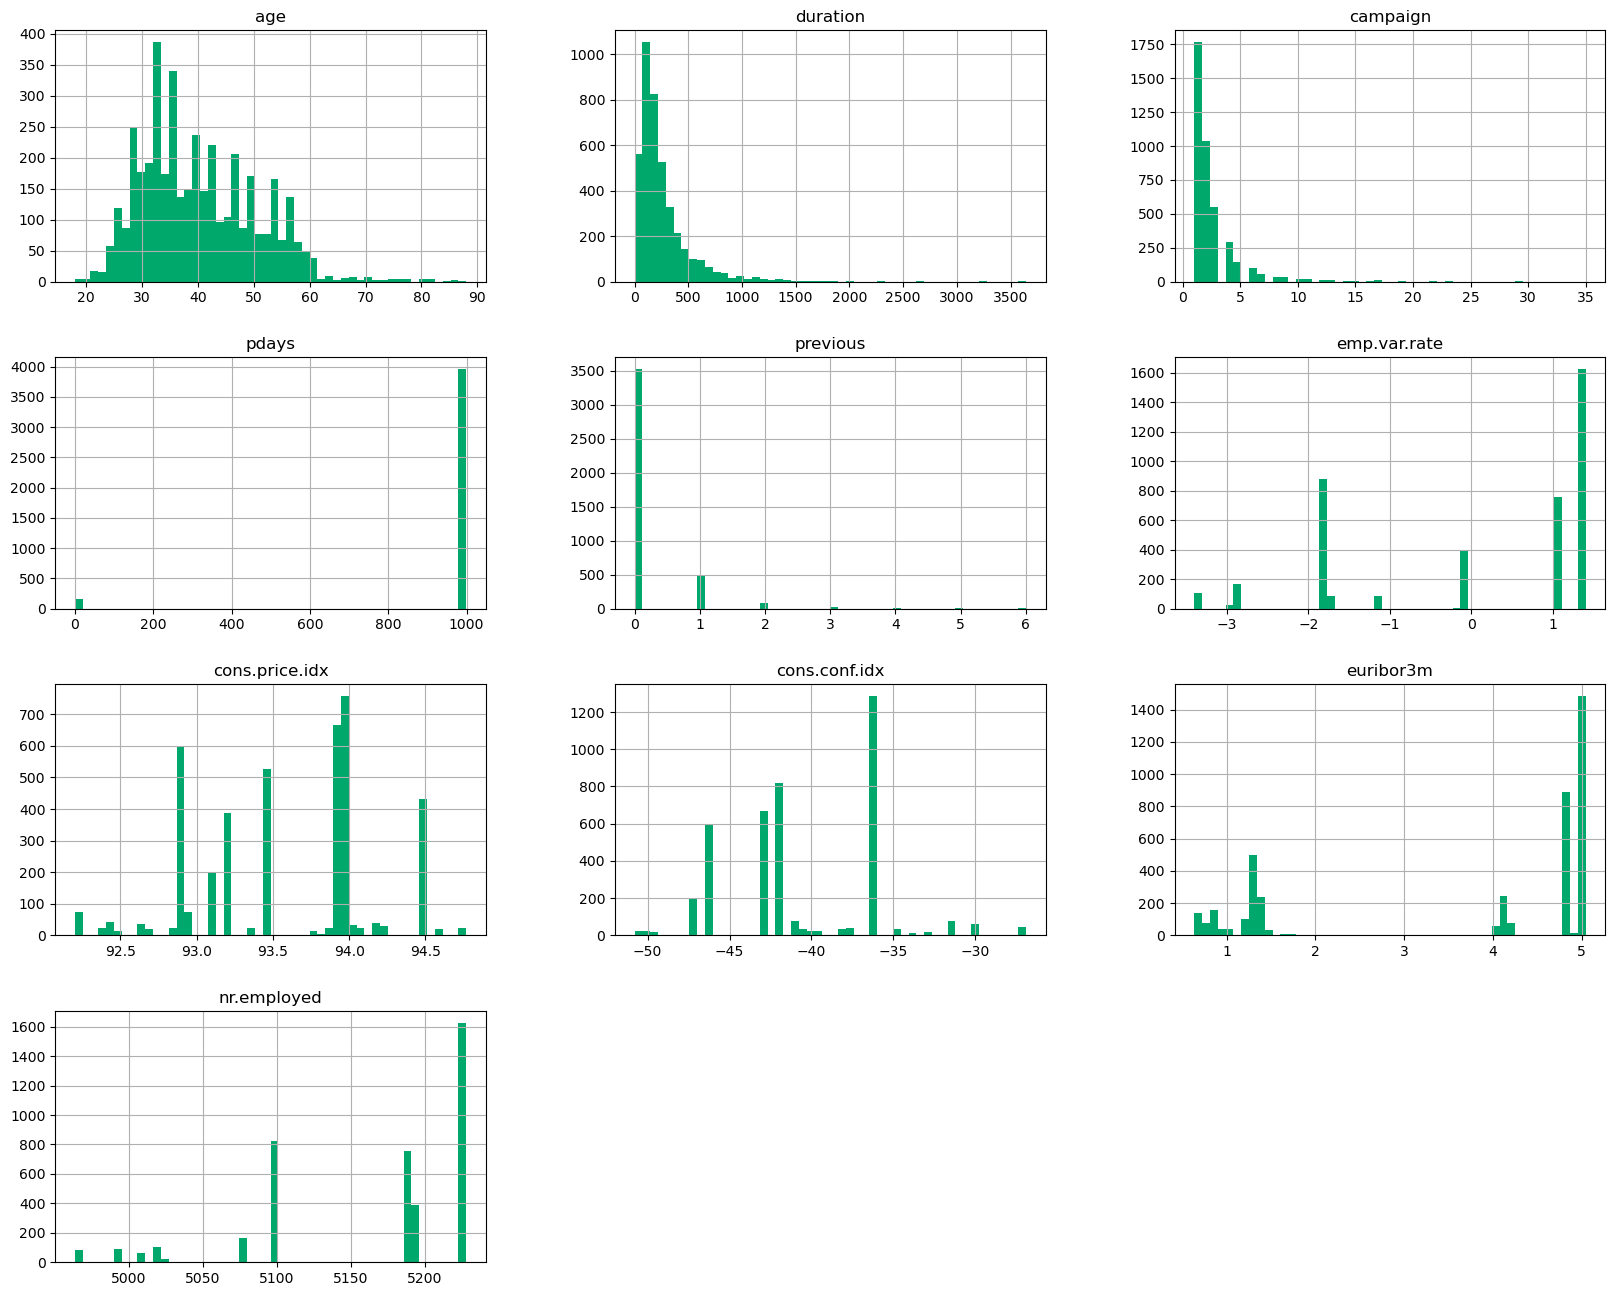

In [11]:
#Column distribution:
%matplotlib inline
df.hist(bins = 50, figsize=(20,16), color = '#00A86B') 
plt.show()

In [12]:
#No duplicate rows exists
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Number of duplicate rows: 0


In [13]:
# Removing outliers from the dataset
from sklearn.ensemble import IsolationForest

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
numerical_col = df.select_dtypes(include=['int64', 'float64'])
numerical_col.head

<bound method NDFrame.head of       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      30       487         2    999         0          -1.8          92.893   
1      39       346         4    999         0           1.1          93.994   
2      25       227         1    999         0           1.4          94.465   
3      38        17         3    999         0           1.4          94.465   
4      47        58         1    999         0          -0.1          93.200   
...   ...       ...       ...    ...       ...           ...             ...   
4114   30        53         1    999         0           1.4          93.918   
4115   39       219         1    999         0           1.4          93.918   
4116   27        64         2    999         1          -1.8          92.893   
4117   58       528         1    999         0           1.4          93.444   
4118   34       175         1    999         0          -0.1          93.200   

      con

In [16]:
clf = IsolationForest(n_jobs=4, random_state=23, contamination=0.01)
clf.fit(numerical_col)
y_pred = clf.predict(numerical_col)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(4119,))

In [17]:
pd.value_counts(y_pred)

 1    4077
-1      42
Name: count, dtype: int64

In [18]:
outliers = numerical_col.loc[y_pred==-1, :]
indices_to_remove = outliers.index


In [19]:
# Outliers has been remowed for numerical columns. In the incoming cell, we will encode categorical variables and save them into a csv file.
df_cleaned = df.drop(indices_to_remove)
df_cleaned.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


In [44]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Assuming df is your initial DataFrame
df_cleaned = df.copy()

# Identify categorical and numerical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Replace 'unknown' with NaN in categorical columns BEFORE imputation
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].replace('unknown', np.nan)

# Impute missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_columns] = cat_imputer.fit_transform(df_cleaned[categorical_columns])

# Impute missing values for numerical columns using median
for col in numerical_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Encoding categorical features using LabelEncoder and storing mappings
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

    # Print mapping for each column
    print(f"\nMapping for column: '{col}'")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} → {i}")

# Encode target variable 'y' using a separate LabelEncoder
target_encoder = LabelEncoder()
df_cleaned['y'] = target_encoder.fit_transform(df_cleaned['y'])

# Print mapping for target column
print(f"\nMapping for target variable 'y':")
for i, class_ in enumerate(target_encoder.classes_):
    print(f"  {class_} → {i}")

# Display the first 3 rows of the cleaned DataFrame
df_cleaned.head(3)



Mapping for column: 'job'
  admin. → 0
  blue-collar → 1
  entrepreneur → 2
  housemaid → 3
  management → 4
  retired → 5
  self-employed → 6
  services → 7
  student → 8
  technician → 9
  unemployed → 10

Mapping for column: 'marital'
  divorced → 0
  married → 1
  single → 2

Mapping for column: 'education'
  basic.4y → 0
  basic.6y → 1
  basic.9y → 2
  high.school → 3
  illiterate → 4
  professional.course → 5
  university.degree → 6

Mapping for column: 'default'
  no → 0
  yes → 1

Mapping for column: 'housing'
  no → 0
  yes → 1

Mapping for column: 'loan'
  no → 0
  yes → 1

Mapping for column: 'contact'
  cellular → 0
  telephone → 1

Mapping for column: 'month'
  apr → 0
  aug → 1
  dec → 2
  jul → 3
  jun → 4
  mar → 5
  may → 6
  nov → 7
  oct → 8
  sep → 9

Mapping for column: 'day_of_week'
  fri → 0
  mon → 1
  thu → 2
  tue → 3
  wed → 4

Mapping for column: 'poutcome'
  failure → 0
  nonexistent → 1
  success → 2

Mapping for column: 'y'
  no → 0
  yes → 1

Mapping fo

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,1,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,1,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0


# Feature Engineering
In this part, we will try to create new features that may help the model learn better.

In [21]:
df_cleaned.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.004299,-0.400474,-0.133738,-0.013772,-0.008669,-0.006690,0.012700,-0.020909,-0.029297,...,-0.014169,-0.043425,0.050931,0.012975,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374
job,-0.004299,1.000000,0.012242,0.139186,0.027520,0.006807,-0.010640,-0.018597,-0.013976,-0.000729,...,0.004915,-0.006141,0.025068,-0.024381,-0.025783,-0.010015,0.030478,-0.025127,-0.037257,0.027752
marital,-0.400474,0.012242,1.000000,0.107472,-0.004466,0.004609,-0.004564,-0.068395,-0.033509,0.004416,...,0.003023,-0.043013,0.042224,0.001688,-0.070562,-0.046629,-0.022546,-0.081397,-0.077046,0.044900
education,-0.133738,0.139186,0.107472,1.000000,-0.005497,0.024077,-0.009417,-0.121900,-0.081109,-0.044223,...,0.016003,-0.060258,0.044461,0.030374,-0.056661,-0.090539,0.111485,-0.047746,-0.059564,0.066135
default,-0.013772,0.027520,-0.004466,-0.005497,1.000000,-0.017351,-0.006838,-0.011590,0.018288,0.011110,...,-0.003260,0.003133,0.023291,-0.038637,-0.001844,-0.010214,-0.005091,0.004780,0.006203,-0.005464
housing,-0.008669,0.006807,0.004609,0.024077,-0.017351,1.000000,0.055614,-0.069382,-0.040372,0.011904,...,-0.017871,-0.021343,0.029777,-0.000390,-0.052881,-0.087778,-0.027442,-0.050651,-0.028699,-0.001006
loan,-0.006690,-0.010640,-0.004564,-0.009417,-0.006838,0.055614,1.000000,0.000217,-0.022947,0.003108,...,-0.024226,0.006231,-0.011662,0.011278,-0.001016,-0.018158,0.001911,0.006409,0.014115,-0.010169
contact,0.012700,-0.018597,-0.068395,-0.121900,-0.011590,-0.069382,0.000217,1.000000,0.258733,-0.009579,...,0.085654,0.120670,-0.215464,0.129369,0.383405,0.574452,0.252035,0.390313,0.261496,-0.137401
month,-0.020909,-0.013976,-0.033509,-0.081109,0.018288,-0.040372,-0.022947,0.258733,1.000000,0.034290,...,-0.083547,-0.054892,0.107278,-0.065263,-0.215358,-0.020019,-0.038617,-0.157782,-0.253833,0.005049
day_of_week,-0.029297,-0.000729,0.004416,-0.044223,0.011110,0.011904,0.003108,-0.009579,0.034290,1.000000,...,-0.039170,0.013141,-0.016652,-0.001393,0.034242,-0.008207,0.038252,0.041313,0.036573,-0.006370


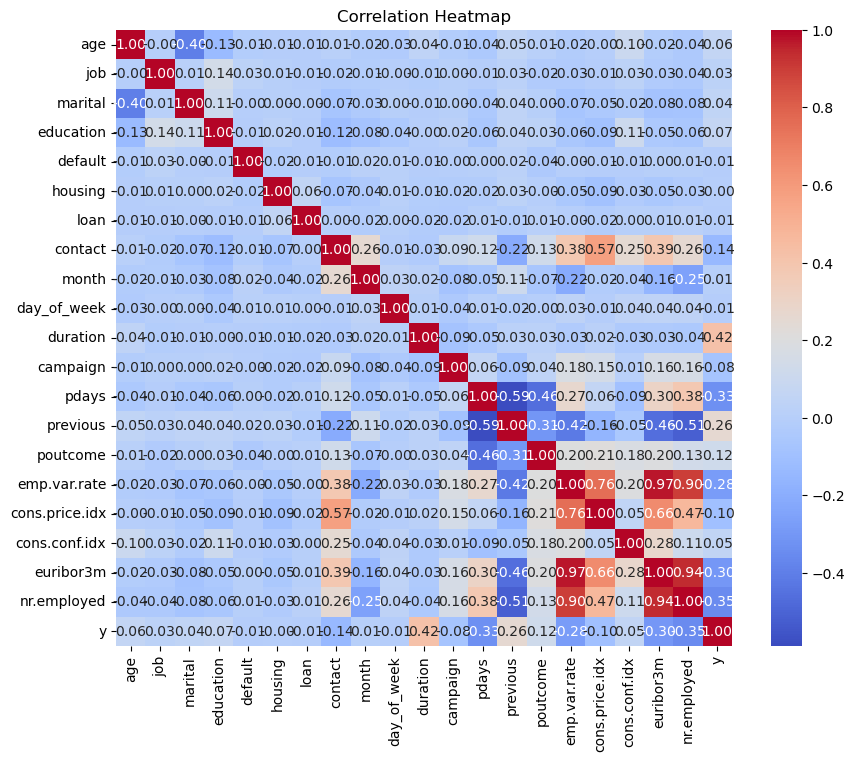

In [22]:
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
correlation_with_target = df_cleaned.corr()['y'].sort_values(ascending=False)
print(correlation_with_target)


y                 1.000000
duration          0.418565
previous          0.255697
poutcome          0.123395
education         0.066135
age               0.060374
cons.conf.idx     0.054393
marital           0.044900
job               0.027752
month             0.005049
housing          -0.001006
default          -0.005464
day_of_week      -0.006370
loan             -0.010169
campaign         -0.076091
cons.price.idx   -0.098326
contact          -0.137401
emp.var.rate     -0.283216
euribor3m        -0.298565
pdays            -0.332012
nr.employed      -0.349241
Name: y, dtype: float64


In [24]:
df_cleaned['economic_index'] = (
    df_cleaned['emp.var.rate'] + df_cleaned['cons.price.idx'] + df_cleaned['nr.employed'] - df_cleaned['euribor3m']
)

df_cleaned['was_contacted_before'] = df_cleaned['pdays'].apply(lambda x: 0 if x == -1 else 1)

df_cleaned.head

<bound method NDFrame.head of       age  job  marital  education  default  housing  loan  contact  month  \
0      30    1        1          2        0        1     0        0      6   
1      39    7        2          3        0        0     0        1      6   
2      25    7        1          3        0        1     0        1      4   
3      38    7        1          2        0        1     0        1      4   
4      47    0        1          6        0        1     0        0      7   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
4114   30    0        1          1        0        1     1        0      3   
4115   39    0        1          3        0        1     0        1      3   
4116   27    8        2          3        0        0     0        0      6   
4117   58    0        1          3        0        0     0        0      1   
4118   34    4        2          3        0        1     0        0      7   

      day_of_week  ...  previous 

In [41]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Assume df_cleaned is already defined
X = df_cleaned.drop('y', axis=1)
y = df_cleaned['y']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply feature selection manually
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get ordered feature names as selected by the selector
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

# Save the ordered list of selected feature names
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_feature_names.tolist(), f)

# Print selected features for verification
print("\nSelected features used for training (ordered):")
for i, feat in enumerate(selected_feature_names, 1):
    print(f"{i}. {feat}")

# Cross-validation config
seed = 42
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)

# Hyperparameters for some models
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_depth = [5, 10, None]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

# Model configs
models = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "classifier__n_neighbors": [10, 12, 15, 17],
            "classifier__weights": ["uniform", "distance"],
            "classifier__metric": ["euclidean", "manhattan", "minkowski"],
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, class_weight='balanced'),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__penalty": ["l2"],
            "classifier__solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=seed, class_weight='balanced'),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": max_depth,
            "classifier__min_samples_split": min_samples_split,
            "classifier__min_samples_leaf": min_samples_leaf,
            "classifier__bootstrap": bootstrap
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=seed, class_weight='balanced'),
        "params": {
            "classifier__max_depth": [5, 10, None],
            "classifier__min_samples_split": [2, 5, 10]
        }
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [3, 5, 7],
            "classifier__learning_rate": [0.01, 0.1, 0.2],
            "classifier__subsample": [0.8, 1.0],
            "classifier__colsample_bytree": [0.8, 1.0]
        }
    }
}

# Train and evaluate each model
for name, config in models.items():
    print(f"\n--- {name} ---")

    # Define pipeline (no selector — already applied)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", config["model"])
    ])

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=config["params"],
        scoring="accuracy",
        n_jobs=-1,
        cv=cv,
        error_score=0
    )

    # Train with reduced features
    grid.fit(X_train_selected, y_train)
    y_pred = grid.predict(X_test_selected)

    # Evaluation
    print(classification_report(y_test, y_pred))
    print("Best Parameters:", grid.best_params_)

    # Save the trained model
    model_filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(grid.best_estimator_, file)
    print(f"Model saved as {model_filename}")



Selected features used for training (ordered):
1. age
2. marital
3. education
4. contact
5. duration
6. campaign
7. pdays
8. previous
9. poutcome
10. emp.var.rate
11. cons.price.idx
12. cons.conf.idx
13. euribor3m
14. nr.employed
15. economic_index

--- KNN ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       734
           1       0.71      0.28      0.40        90

    accuracy                           0.91       824
   macro avg       0.82      0.63      0.68       824
weighted avg       0.90      0.91      0.89       824

Best Parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 17, 'classifier__weights': 'distance'}
Model saved as knn_model.pkl

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       734
           1       0.45      0.88      0.59        90

    accuracy                           0.87       824
   macro avg   

In [34]:
# Ensure X_train is a DataFrame
feature_names = X_train.columns

# Get indices of selected features from the manually applied selector
selected_indices = selector.get_support(indices=True)
selected_features = feature_names[selected_indices]

print("Selected features:")
for feat in selected_features:
    print(f"- {feat}")


Selected features:
- age
- marital
- education
- contact
- duration
- campaign
- pdays
- previous
- poutcome
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed
- economic_index


In [38]:
model_path = 'knn_model.pkl'
knn_model = pickle.load(open(model_path,'rb'))

params = knn_model.get_params()
print(knn_model.n_features_in_)    # total number of features


15



Mapping for column: job
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4
  5 → 5
  6 → 6
  7 → 7
  8 → 8
  9 → 9
  10 → 10

Mapping for column: marital
  0 → 0
  1 → 1
  2 → 2

Mapping for column: education
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4
  5 → 5
  6 → 6

Mapping for column: default
  0 → 0
  1 → 1

Mapping for column: housing
  0 → 0
  1 → 1

Mapping for column: loan
  0 → 0
  1 → 1

Mapping for column: contact
  0 → 0
  1 → 1

Mapping for column: month
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4
  5 → 5
  6 → 6
  7 → 7
  8 → 8
  9 → 9

Mapping for column: day_of_week
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4

Mapping for column: poutcome
  0 → 0
  1 → 1
  2 → 2

Mapping for column: y
  0 → 0
  1 → 1
